Milesone Two Imputed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
#from google.colab import files
#uploaded = files.upload()
#from google.colab import drive

In [ ]:
#drive.mount('/content/drive', force_remount=True)
# Check the top-level contents
#os.listdir('/content/drive/MyDrive')

In [4]:
df = pd.read_csv("Covid Data.csv")

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

Cheak for duplicates

In [5]:
dup=df.duplicated().sum()
print(f'No. of duplicates ={dup}')

No. of duplicates =812049


In [4]:
df[df.duplicated(keep=False)]

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
6,2,1,1,1,9999-99-99,97,2,64,2,2,...,2,2,2,2,2,2,2,2,3,97
19,2,1,1,1,9999-99-99,97,2,64,2,2,...,2,2,2,2,2,2,2,2,3,97
22,2,1,2,1,9999-99-99,97,2,45,97,2,...,2,2,2,2,2,2,2,2,3,97
35,2,1,2,1,9999-99-99,97,2,45,97,2,...,2,2,2,2,2,2,2,2,3,97
49,2,1,1,1,9999-99-99,97,2,30,2,2,...,2,2,2,2,2,2,2,2,7,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048556,2,13,2,1,9999-99-99,97,2,31,97,2,...,2,2,2,2,2,2,2,2,7,97
1048558,1,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97
1048566,2,13,2,1,9999-99-99,97,2,24,97,2,...,1,2,2,2,2,2,2,2,7,97
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97


In [6]:
dfe = df[df.eq(df.iloc[1048573]).all(axis=1)].copy()
dfe

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1048349,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97
1048418,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97
1048435,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97
1048513,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [6]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236526 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   USMER                 236526 non-null  int64 
 1   MEDICAL_UNIT          236526 non-null  int64 
 2   SEX                   236526 non-null  int64 
 3   PATIENT_TYPE          236526 non-null  int64 
 4   DATE_DIED             236526 non-null  object
 5   INTUBED               236526 non-null  int64 
 6   PNEUMONIA             236526 non-null  int64 
 7   AGE                   236526 non-null  int64 
 8   PREGNANT              236526 non-null  int64 
 9   DIABETES              236526 non-null  int64 
 10  COPD                  236526 non-null  int64 
 11  ASTHMA                236526 non-null  int64 
 12  INMSUPR               236526 non-null  int64 
 13  HIPERTENSION          236526 non-null  int64 
 14  OTHER_DISEASE         236526 non-null  int64 
 15  CARDIOVASCULAR       

In [7]:
# Replace '97' , '98' and '99'  with NaN (missing values)
columns_to_replace = df.columns.difference(["AGE", "DATE_DIED"])
df[columns_to_replace] = df[columns_to_replace].replace({97: np.nan, 99: np.nan, 98: np.nan})

# Convert DATE_DIED into datetime format, treating "9999-99-99" as NaT (Not a Time)
df['DATE_DIED'] = pd.to_datetime(df['DATE_DIED'], errors='coerce')

# Add a new binary column 'DIED' (1 if the patient died, 0 otherwise)
df['DIED'] = df['DATE_DIED'].notna().map({False: 0 , True: 1})

# Define COVID status (1 if the patient +ve, 0 -ve)
df['COVID_status'] = df['CLASIFFICATION_FINAL'].apply(lambda x: 1 if x <= 3 else 0)


# Check missing values and basic statistics again
missing_values = df.isnull().sum()
summary_stats =df['AGE'].describe()

In [7]:
missing_values

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED               206423
INTUBED                 105387
PNEUMONIA                 7187
AGE                          0
PREGNANT                131457
DIABETES                  2840
COPD                      2529
ASTHMA                    2506
INMSUPR                   2926
HIPERTENSION              2620
OTHER_DISEASE             4362
CARDIOVASCULAR            2603
OBESITY                   2554
RENAL_CHRONIC             2531
TOBACCO                   2738
CLASIFFICATION_FINAL         0
ICU                     105536
DIED                         0
COVID_status                 0
dtype: int64

In [65]:
summary_stats

count    236526.000000
mean         52.620274
std          19.318869
min           0.000000
25%          40.000000
50%          54.000000
75%          67.000000
max         121.000000
Name: AGE, dtype: float64

In [8]:
Died_counts = df['DIED'].value_counts().sort_index()
Died_counts

DIED
0    206423
1     30103
Name: count, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236526 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   USMER                 236526 non-null  int64         
 1   MEDICAL_UNIT          236526 non-null  int64         
 2   SEX                   236526 non-null  int64         
 3   PATIENT_TYPE          236526 non-null  int64         
 4   DATE_DIED             30103 non-null   datetime64[ns]
 5   INTUBED               131139 non-null  float64       
 6   PNEUMONIA             229339 non-null  float64       
 7   AGE                   236526 non-null  int64         
 8   PREGNANT              105069 non-null  float64       
 9   DIABETES              233686 non-null  float64       
 10  COPD                  233997 non-null  float64       
 11  ASTHMA                234020 non-null  float64       
 12  INMSUPR               233600 non-null  float64       
 13  HIP

In [8]:
columns_to_drop = ["MEDICAL_UNIT", "DATE_DIED", "CLASIFFICATION_FINAL"]
df = df.drop(columns=columns_to_drop, errors="ignore")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236526 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   USMER           236526 non-null  category
 1   SEX             236526 non-null  category
 2   PATIENT_TYPE    236526 non-null  category
 3   INTUBED         131139 non-null  category
 4   PNEUMONIA       229339 non-null  category
 5   AGE             236526 non-null  int64   
 6   PREGNANT        105069 non-null  category
 7   DIABETES        233686 non-null  category
 8   COPD            233997 non-null  category
 9   ASTHMA          234020 non-null  category
 10  INMSUPR         233600 non-null  category
 11  HIPERTENSION    233906 non-null  category
 12  OTHER_DISEASE   232164 non-null  category
 13  CARDIOVASCULAR  233923 non-null  category
 14  OBESITY         233972 non-null  category
 15  RENAL_CHRONIC   233995 non-null  category
 16  TOBACCO         233788 non-null  category


In [10]:
df.head()


,USMER,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU,DIED,COVID_status
0,2,1,1,NaN,1.0,65,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,1,1
1,2,2,1,NaN,1.0,72,NaN,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,NaN,1,0
2,2,2,2,1.0,2.0,55,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,1
3,2,1,1,NaN,2.0,53,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1,0
4,2,2,1,NaN,2.0,68,NaN,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,0,1


In [102]:
missing_values2 = df.isnull().sum()

In [138]:
missing_values2

USMER                  0
SEX                    0
PATIENT_TYPE           0
INTUBED           855869
PNEUMONIA          16003
AGE                    0
PREGNANT          527265
DIABETES            3338
COPD                3003
ASTHMA              2979
INMSUPR             3404
HIPERTENSION        3104
OTHER_DISEASE       5045
CARDIOVASCULAR      3076
OBESITY             3032
RENAL_CHRONIC       3006
TOBACCO             3220
ICU               856032
DIED                   0
COVID_status           0
dtype: int64

<Axes: >

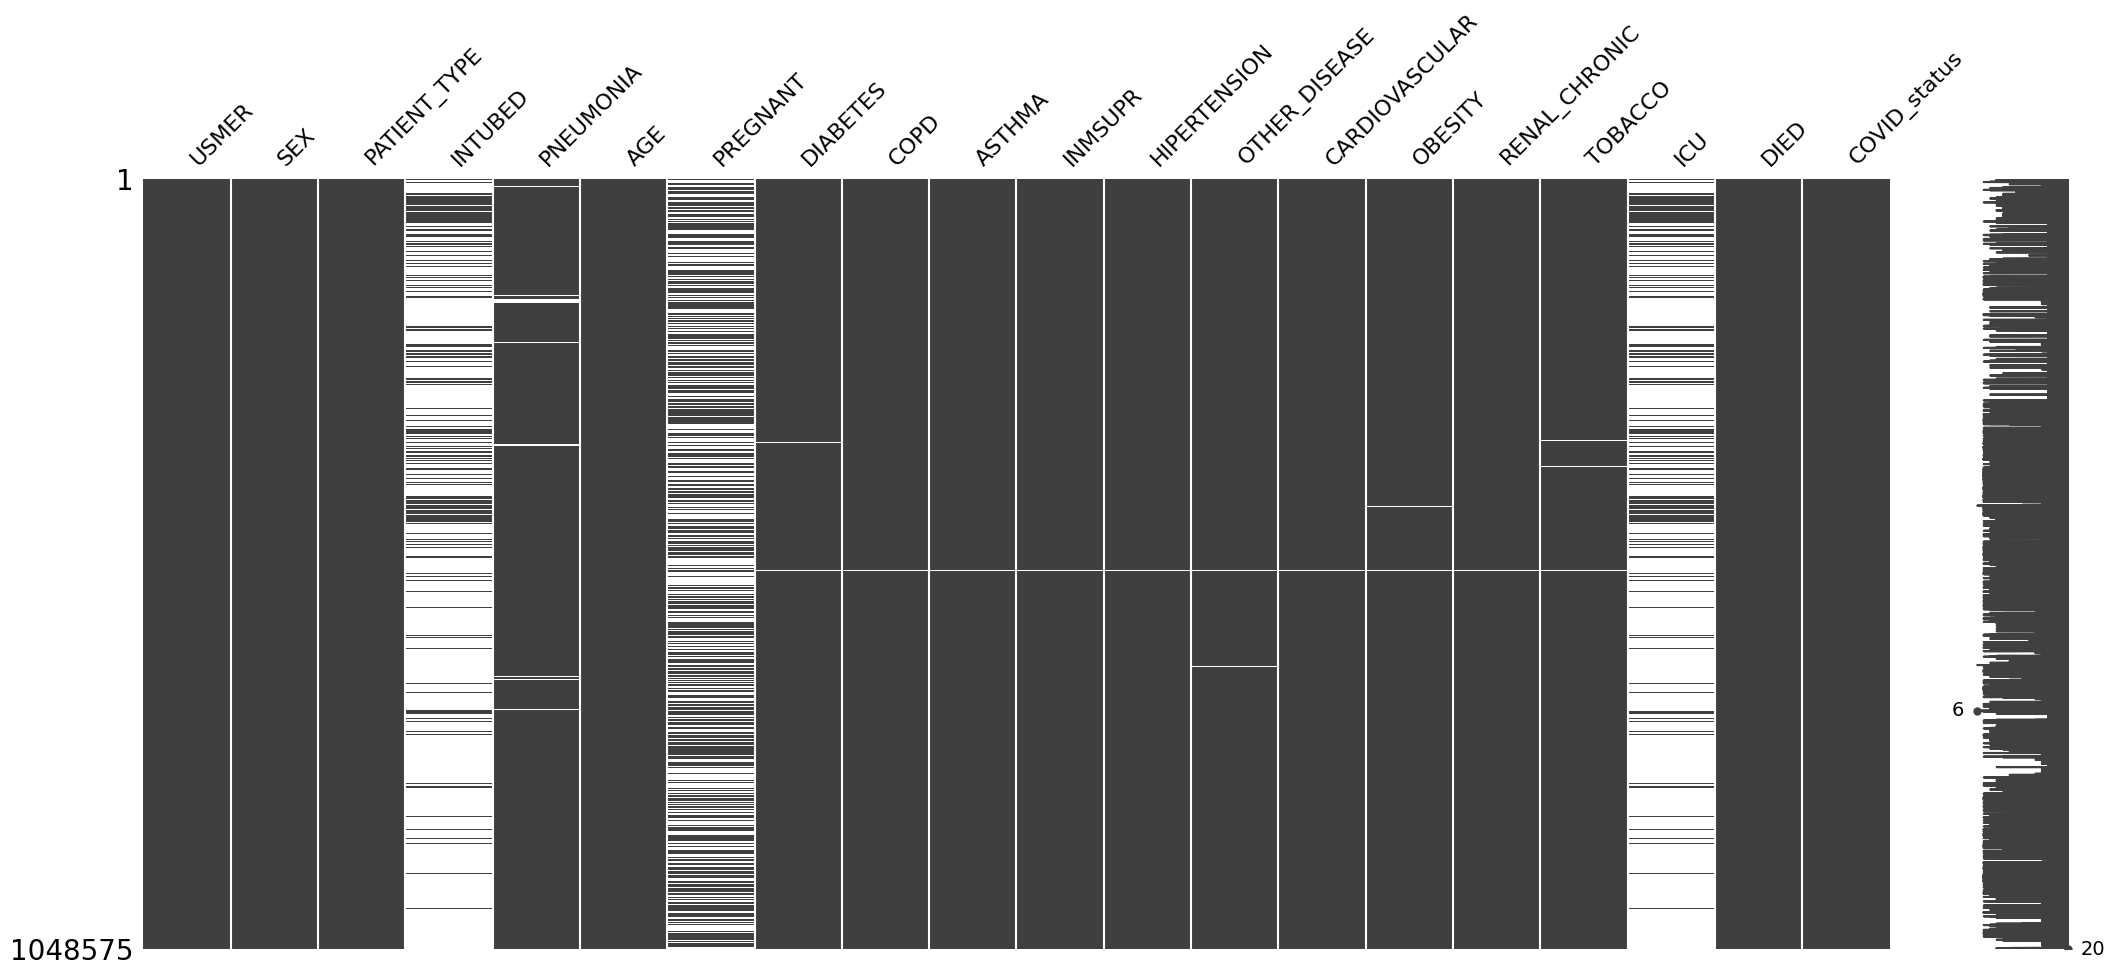

In [11]:
msno.matrix(df)

In [16]:
df['PREGNANT'].value_counts()

PREGNANT
2.0    102049
1.0      3020
Name: count, dtype: int64

In [15]:
df['USMER'].value_counts()

USMER
2    121181
1    115345
Name: count, dtype: int64

drop 'PREGNANT' column beacase more than 50% of its values is nan

In [17]:
female=len(df[df['SEX']==1])
fmal_npre=len(df[(df['PREGNANT'] == 2) & (df['SEX'] == 1)])
fmal_pre=len(df[(df['PREGNANT'] == 1) & (df['SEX'] == 1)])
print(f'no.of females:{female}')
print(f'no.of females & not pregnant:{fmal_npre}')
print(f'no.of females & pregnant:{fmal_pre}')

no.of females:107023
no.of females & not pregnant:102049
no.of females & pregnant:3020


In [12]:
columns_to_drop = ["PREGNANT"]
df = df.drop(columns=columns_to_drop, errors="ignore")

In [16]:
df.columns

Index(['USMER', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA', 'AGE',
       'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'ICU', 'DIED', 'COVID_status'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236526 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   USMER           236526 non-null  category
 1   SEX             236526 non-null  category
 2   PATIENT_TYPE    236526 non-null  category
 3   INTUBED         131139 non-null  category
 4   PNEUMONIA       229339 non-null  category
 5   AGE             236526 non-null  int64   
 6   DIABETES        233686 non-null  category
 7   COPD            233997 non-null  category
 8   ASTHMA          234020 non-null  category
 9   INMSUPR         233600 non-null  category
 10  HIPERTENSION    233906 non-null  category
 11  OTHER_DISEASE   232164 non-null  category
 12  CARDIOVASCULAR  233923 non-null  category
 13  OBESITY         233972 non-null  category
 14  RENAL_CHRONIC   233995 non-null  category
 15  TOBACCO         233788 non-null  category
 16  ICU             130990 non-null  category


In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

def find_category_mappings(df, variable):
    """Create integer mapping for a categorical variable."""
    return {k: i for i, k in enumerate(df[variable].dropna().unique())}

def integer_encode(df, variable, ordinal_mapping):
    """Apply integer mapping to a categorical column."""
    df[variable] = df[variable].map(ordinal_mapping)

def imputation(df1, cols_to_impute, sensitive_cols=[], normalize=True, n_neighbors=5):
    """
    Perform KNN imputation on a DataFrame with optional normalization and category handling.
    
    Args:
        df1: Input DataFrame.
        cols_to_impute: List of categorical column names to encode/decode.
        sensitive_cols: List of numeric columns to preserve original non-missing values (e.g., 'age').
        normalize: Whether to normalize using MinMaxScaler before imputation.
        n_neighbors: Number of neighbors to use in KNNImputer.
    
    Returns:
        Imputed DataFrame with original categorical values restored.
    """
    df = df1.copy()
    mappings = {}

    # Save original non-missing values for sensitive columns
    original_values = df[sensitive_cols].copy()
    missing_mask = df[sensitive_cols].isna()

    # Encode categorical columns
    for col in cols_to_impute:
        mappings[col] = find_category_mappings(df, col)
        integer_encode(df, col, mappings[col])

    # Normalize if needed
    if normalize:
        scaler = MinMaxScaler()
        scaled = scaler.fit_transform(df)
    else:
        scaled = df.values

    # KNN imputation
    knn_imputer = KNNImputer(n_neighbors=n_neighbors)
    imputed = knn_imputer.fit_transform(scaled)

    # Reverse scaling
    if normalize:
        df.iloc[:, :] = scaler.inverse_transform(imputed)
    else:
        df.iloc[:, :] = imputed

    # Round and cast to int
    df = df.round()

    # Restore original non-missing sensitive values
    for col in sensitive_cols:
        df.loc[~missing_mask[col], col] = original_values[col]

    # Convert entire DataFrame to int
    df = df.astype(int)

    # Decode categorical columns
    for col in cols_to_impute:
        inverse_map = {v: k for k, v in mappings[col].items()}
        df[col] = df[col].map(inverse_map)

    return df


In [ ]:
# Initialize DataFrame copy
df4 = df.copy()

# Save original dtypes
original_dtypes = df.dtypes.copy()

# Columns to impute
columns_to_impute = ['INTUBED', 'ICU']

# Apply imputation
for col in columns_to_impute:
    df2 = imputation(df, [col])
    df4[col] = df2[col]

# Safely restore dtypes
for col in df4.columns:
    if original_dtypes[col].name == 'category':
        # Convert the imputed values to match the category dtype and ensure valid category values
        # Round or map the imputed values to valid categories (e.g., 0, 1, 2)
        df2[col] = df2[col].round().astype(int) 
    else:
        # Restore original type (e.g., int, float, object, etc.)
        df4[col] = df4[col].astype(original_dtypes[col])
        
# Safely restore dtypes for all columns
for col in df4.columns:
    if original_dtypes[col].name == 'category':
        # Restore to category directly (assuming imputation returns valid category values)
        df4[col] = df4[col].astype('category')
    else:
        # Restore original type (e.g., int, float, object, etc.)
        df4[col] = df4[col].astype(original_dtypes[col])
# Save to CSV
df4.to_csv("/content/drive/MyDrive/imputed_covid_data_m2.csv", index=False)
print("✅ Also saved to Google Drive: 'MyDrive/imputed_covid_data_m2.csv'")

# Download the file
from google.colab import files
files.download('/content/drive/MyDrive/imputed_covid_data_m2.csv')



In [44]:
df = pd.read_csv('imputed_covid_data_m2.csv')
df.columns


Index(['USMER', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA', 'AGE',
       'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'ICU', 'DIED', 'COVID_status'],
      dtype='object')

<Axes: >

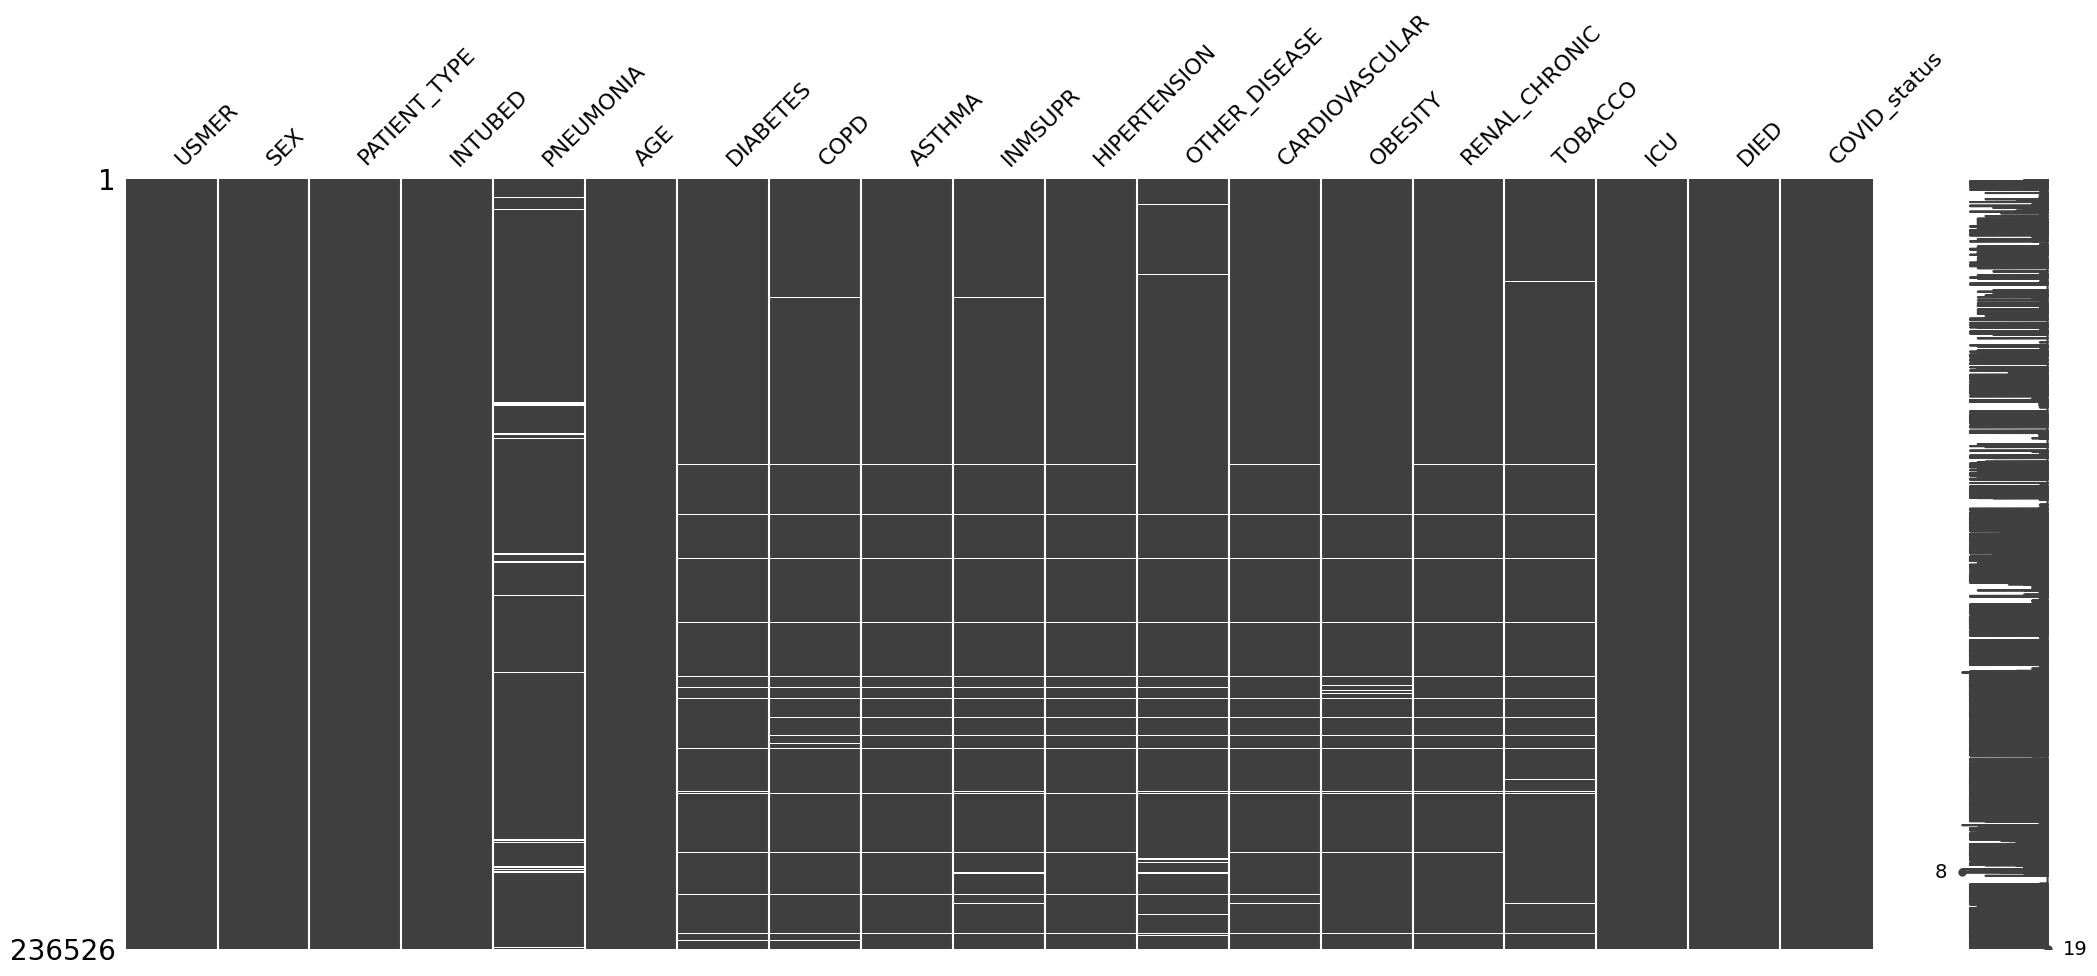

In [45]:
msno.matrix(df)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236526 entries, 0 to 236525
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   USMER           236526 non-null  int64  
 1   SEX             236526 non-null  int64  
 2   PATIENT_TYPE    236526 non-null  int64  
 3   INTUBED         236526 non-null  float64
 4   PNEUMONIA       229339 non-null  float64
 5   AGE             236526 non-null  int64  
 6   DIABETES        233686 non-null  float64
 7   COPD            233997 non-null  float64
 8   ASTHMA          234020 non-null  float64
 9   INMSUPR         233600 non-null  float64
 10  HIPERTENSION    233906 non-null  float64
 11  OTHER_DISEASE   232164 non-null  float64
 12  CARDIOVASCULAR  233923 non-null  float64
 13  OBESITY         233972 non-null  float64
 14  RENAL_CHRONIC   233995 non-null  float64
 15  TOBACCO         233788 non-null  float64
 16  ICU             236526 non-null  float64
 17  DIED      

In [5]:
df.isnull().sum()

USMER                0
SEX                  0
PATIENT_TYPE         0
INTUBED              0
PNEUMONIA         7187
AGE                  0
DIABETES          2840
COPD              2529
ASTHMA            2506
INMSUPR           2926
HIPERTENSION      2620
OTHER_DISEASE     4362
CARDIOVASCULAR    2603
OBESITY           2554
RENAL_CHRONIC     2531
TOBACCO           2738
ICU                  0
DIED                 0
COVID_status         0
dtype: int64

In [6]:
df.head()

,USMER,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU,DIED,COVID_status
0,2,1,1,2.0,1.0,65,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1,1
1,2,2,1,2.0,1.0,72,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1,0
2,2,2,2,1.0,2.0,55,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,1
3,2,1,1,1.0,2.0,53,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,0
4,2,2,1,2.0,2.0,68,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0,1


In [46]:
# Drop rows with NaN values
df_cleaned = df.dropna()


In [47]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222655 entries, 0 to 236525
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   USMER           222655 non-null  int64  
 1   SEX             222655 non-null  int64  
 2   PATIENT_TYPE    222655 non-null  int64  
 3   INTUBED         222655 non-null  float64
 4   PNEUMONIA       222655 non-null  float64
 5   AGE             222655 non-null  int64  
 6   DIABETES        222655 non-null  float64
 7   COPD            222655 non-null  float64
 8   ASTHMA          222655 non-null  float64
 9   INMSUPR         222655 non-null  float64
 10  HIPERTENSION    222655 non-null  float64
 11  OTHER_DISEASE   222655 non-null  float64
 12  CARDIOVASCULAR  222655 non-null  float64
 13  OBESITY         222655 non-null  float64
 14  RENAL_CHRONIC   222655 non-null  float64
 15  TOBACCO         222655 non-null  float64
 16  ICU             222655 non-null  float64
 17  DIED           

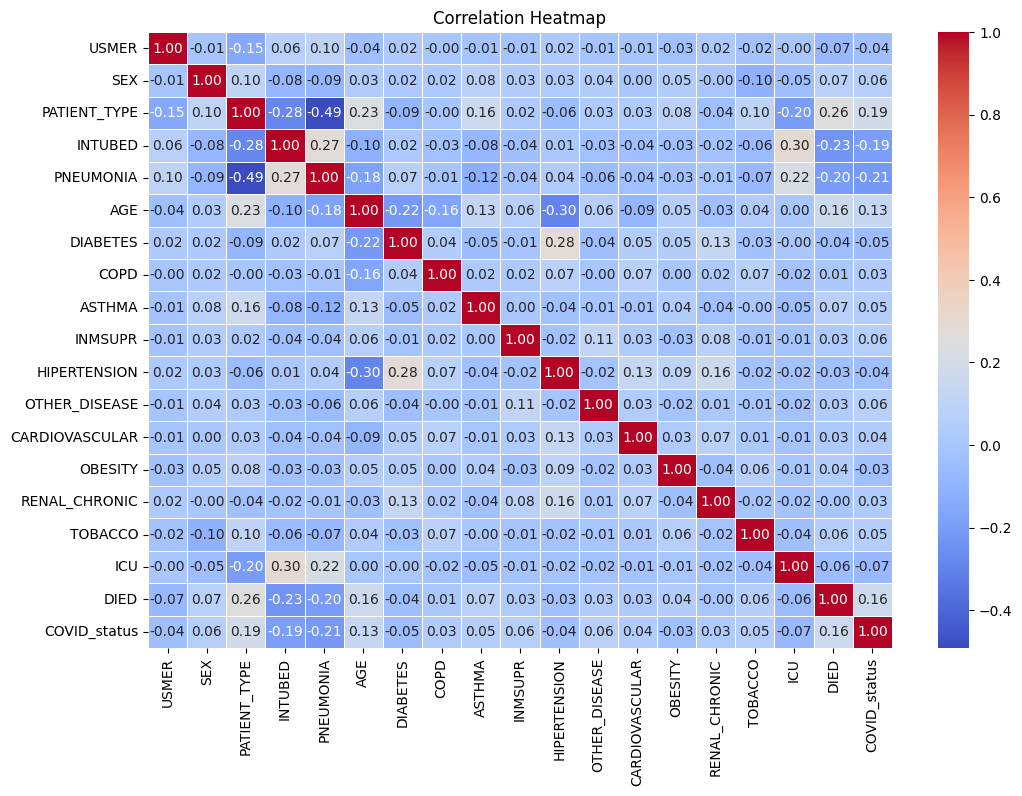

In [48]:
# Compute the correlation matrix
corr = df_cleaned.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [10]:
# Convert categorical variables to appropriate data types
categorical_cols = ['SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA', 'DIABETES', 'USMER',
                    'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'DIED',
                    'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'ICU', 'COVID_status']

df[categorical_cols] = df[categorical_cols].astype('category')

In [11]:
# First, let's check the unique values in the dataset to identify problematic values
unique_values = {col: df[col].unique() for col in df.columns}

# Display a summary of unique values in categorical columns to identify placeholders
unique_values

{'USMER': [2, 1]
 Categories (2, int64): [1, 2],
 'SEX': [1, 2]
 Categories (2, int64): [1, 2],
 'PATIENT_TYPE': [1, 2]
 Categories (2, int64): [1, 2],
 'INTUBED': [2.0, 1.0]
 Categories (2, float64): [1.0, 2.0],
 'PNEUMONIA': [1.0, 2.0, NaN]
 Categories (2, float64): [1.0, 2.0],
 'AGE': array([ 65,  72,  55,  53,  68,  40,  64,  37,  25,  38,  24,  30,  48,
         23,  80,  61,  54,  59,  45,  26,  32,  49,  39,  27,  57,  20,
         56,  47,  50,  46,  43,  28,  33,  16,  62,  58,  36,  44,  66,
         52,  51,  35,  19,  90,  34,  22,  29,  14,  31,  42,  15,   1,
          0,  17,  41,   2,  10,  12,  13,   4,   7,   6,   8,  60,   5,
         63,  75,  81,  67,  18,  70,  88,  85,  92,  73,  74,  78,  76,
         82,  77,  86,  71,  95,  87,  83,  84,  79,  69,  89,   3,  97,
         93, 100,  91,  21, 103,  11,   9,  94,  96, 101, 107, 102,  98,
         99, 109, 119, 116, 105, 104, 111, 114, 120, 106, 108, 110, 118,
        117, 121, 115, 113]),
 'DIABETES': [2.0, 1.0, N

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236526 entries, 0 to 236525
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   USMER           236526 non-null  category
 1   SEX             236526 non-null  category
 2   PATIENT_TYPE    236526 non-null  category
 3   INTUBED         236526 non-null  category
 4   PNEUMONIA       229339 non-null  category
 5   AGE             236526 non-null  int64   
 6   DIABETES        233686 non-null  category
 7   COPD            233997 non-null  category
 8   ASTHMA          234020 non-null  category
 9   INMSUPR         233600 non-null  category
 10  HIPERTENSION    233906 non-null  category
 11  OTHER_DISEASE   232164 non-null  category
 12  CARDIOVASCULAR  233923 non-null  category
 13  OBESITY         233972 non-null  category
 14  RENAL_CHRONIC   233995 non-null  category
 15  TOBACCO         233788 non-null  category
 16  ICU             236526 non-null  categ

In [13]:
df.head()

,USMER,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU,DIED,COVID_status
0,2,1,1,2.0,1.0,65,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1,1
1,2,2,1,2.0,1.0,72,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1,0
2,2,2,2,1.0,2.0,55,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,1
3,2,1,1,1.0,2.0,53,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,0
4,2,2,1,2.0,2.0,68,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0,1


In [14]:
# Define categorical columns for replacement
categorical_cols_missing = ['INTUBED', 'PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA',
                            'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR',
                            'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'ICU']

# Replace categorical values with meaningful labels and add 'Unknown' category
for col in categorical_cols_missing:
    df[col] = df[col].replace({1: "Yes", 1.0: "Yes", 2: "No", 2.0: "No"})
    df[col] = df[col].astype("category")
    if "Unknown" not in df[col].cat.categories:
        df[col] = df[col].cat.add_categories("Unknown")
    df[col] = df[col].fillna("Unknown")

# Define mappings for specific categorical columns
specific_mappings_with_unknown = {
    "COVID_status" : {1: "Positive", 0: "Negative"},
    "DIED" : {1: "Died", 0: "Alive"},
    "SEX": {1: "Female", 1.0: "Female", 2: "Male", 2.0: "Male"},
    "PATIENT_TYPE": {1: "Home", 1.0: "Home", 2: "Hospital", 2.0: "Hospital"},
    "USMER": {1: "Level_One", 1.0: "Level_One", 2: "Level_Two", 2.0: "Level_Two", 3: "Level_Three", 3.0: "Level_Three"}
}

# Apply the mappings and ensure 'Unknown' category exists
for col, mapping in specific_mappings_with_unknown.items():
    df[col] = df[col].replace(mapping)
    df[col] = df[col].astype("category")
    if "Unknown" not in df[col].cat.categories:
        df[col] = df[col].cat.add_categories("Unknown")
    df[col] = df[col].fillna("Unknown")

# Verify unique values after modifications
unique_values = {col: df[col].unique() for col in categorical_cols_missing + list(specific_mappings_with_unknown.keys())}
print(unique_values)


{'INTUBED': ['No', 'Yes']
Categories (3, object): ['Yes', 'No', 'Unknown'], 'PNEUMONIA': ['Yes', 'No', 'Unknown']
Categories (3, object): ['Yes', 'No', 'Unknown'], 'DIABETES': ['No', 'Yes', 'Unknown']
Categories (3, object): ['Yes', 'No', 'Unknown'], 'COPD': ['No', 'Yes', 'Unknown']
Categories (3, object): ['Yes', 'No', 'Unknown'], 'ASTHMA': ['No', 'Yes', 'Unknown']
Categories (3, object): ['Yes', 'No', 'Unknown'], 'INMSUPR': ['No', 'Yes', 'Unknown']
Categories (3, object): ['Yes', 'No', 'Unknown'], 'HIPERTENSION': ['Yes', 'No', 'Unknown']
Categories (3, object): ['Yes', 'No', 'Unknown'], 'OTHER_DISEASE': ['No', 'Yes', 'Unknown']
Categories (3, object): ['Yes', 'No', 'Unknown'], 'CARDIOVASCULAR': ['No', 'Yes', 'Unknown']
Categories (3, object): ['Yes', 'No', 'Unknown'], 'OBESITY': ['No', 'Yes', 'Unknown']
Categories (3, object): ['Yes', 'No', 'Unknown'], 'RENAL_CHRONIC': ['No', 'Yes', 'Unknown']
Categories (3, object): ['Yes', 'No', 'Unknown'], 'TOBACCO': ['No', 'Yes', 'Unknown']
Categ

C:\Users\mahmo\AppData\Local\Temp\ipykernel_29200\382229495.py:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[col] = df[col].replace({1: "Yes", 1.0: "Yes", 2: "No", 2.0: "No"})
C:\Users\mahmo\AppData\Local\Temp\ipykernel_29200\382229495.py:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[col] = df[col].replace({1: "Yes", 1.0: "Yes", 2: "No", 2.0: "No"})
C:\Users\mahmo\AppData\Local\Temp\ipykernel_29200\382229495.py:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will

In [15]:
df.head()

,USMER,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU,DIED,COVID_status
0,Level_Two,Female,Home,No,Yes,65,No,No,No,No,Yes,No,No,No,No,No,No,Died,Positive
1,Level_Two,Male,Home,No,Yes,72,No,No,No,No,Yes,No,No,Yes,Yes,No,No,Died,Negative
2,Level_Two,Male,Hospital,Yes,No,55,Yes,No,No,No,No,No,No,No,No,No,No,Died,Positive
3,Level_Two,Female,Home,Yes,No,53,No,No,No,No,No,No,No,No,No,No,No,Died,Negative
4,Level_Two,Male,Home,No,No,68,Yes,No,No,No,Yes,No,No,No,No,No,No,Alive,Positive


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236526 entries, 0 to 236525
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   USMER           236526 non-null  category
 1   SEX             236526 non-null  category
 2   PATIENT_TYPE    236526 non-null  category
 3   INTUBED         236526 non-null  category
 4   PNEUMONIA       236526 non-null  category
 5   AGE             236526 non-null  int64   
 6   DIABETES        236526 non-null  category
 7   COPD            236526 non-null  category
 8   ASTHMA          236526 non-null  category
 9   INMSUPR         236526 non-null  category
 10  HIPERTENSION    236526 non-null  category
 11  OTHER_DISEASE   236526 non-null  category
 12  CARDIOVASCULAR  236526 non-null  category
 13  OBESITY         236526 non-null  category
 14  RENAL_CHRONIC   236526 non-null  category
 15  TOBACCO         236526 non-null  category
 16  ICU             236526 non-null  categ

In [17]:
#Save&reopen
df.to_csv('stat2_covid_imputed.csv', index=False)

In [18]:
raw_df = pd.read_csv('stat2_covid_imputed.csv')
df = raw_df.copy()

In [19]:
df.isnull().sum()


USMER             0
SEX               0
PATIENT_TYPE      0
INTUBED           0
PNEUMONIA         0
AGE               0
DIABETES          0
COPD              0
ASTHMA            0
INMSUPR           0
HIPERTENSION      0
OTHER_DISEASE     0
CARDIOVASCULAR    0
OBESITY           0
RENAL_CHRONIC     0
TOBACCO           0
ICU               0
DIED              0
COVID_status      0
dtype: int64

In [20]:
# Count NaNs and "Unknown" values per column
unknown_counts = pd.DataFrame({
    "NaN_count": df.isnull().sum(),
    "Unknown_count": (df == "Unknown").sum()
})

In [21]:
unknown_counts 

,NaN_count,Unknown_count
USMER,0,0
SEX,0,0
PATIENT_TYPE,0,0
INTUBED,0,0
PNEUMONIA,0,7187
AGE,0,0
DIABETES,0,2840
COPD,0,2529
ASTHMA,0,2506
INMSUPR,0,2926


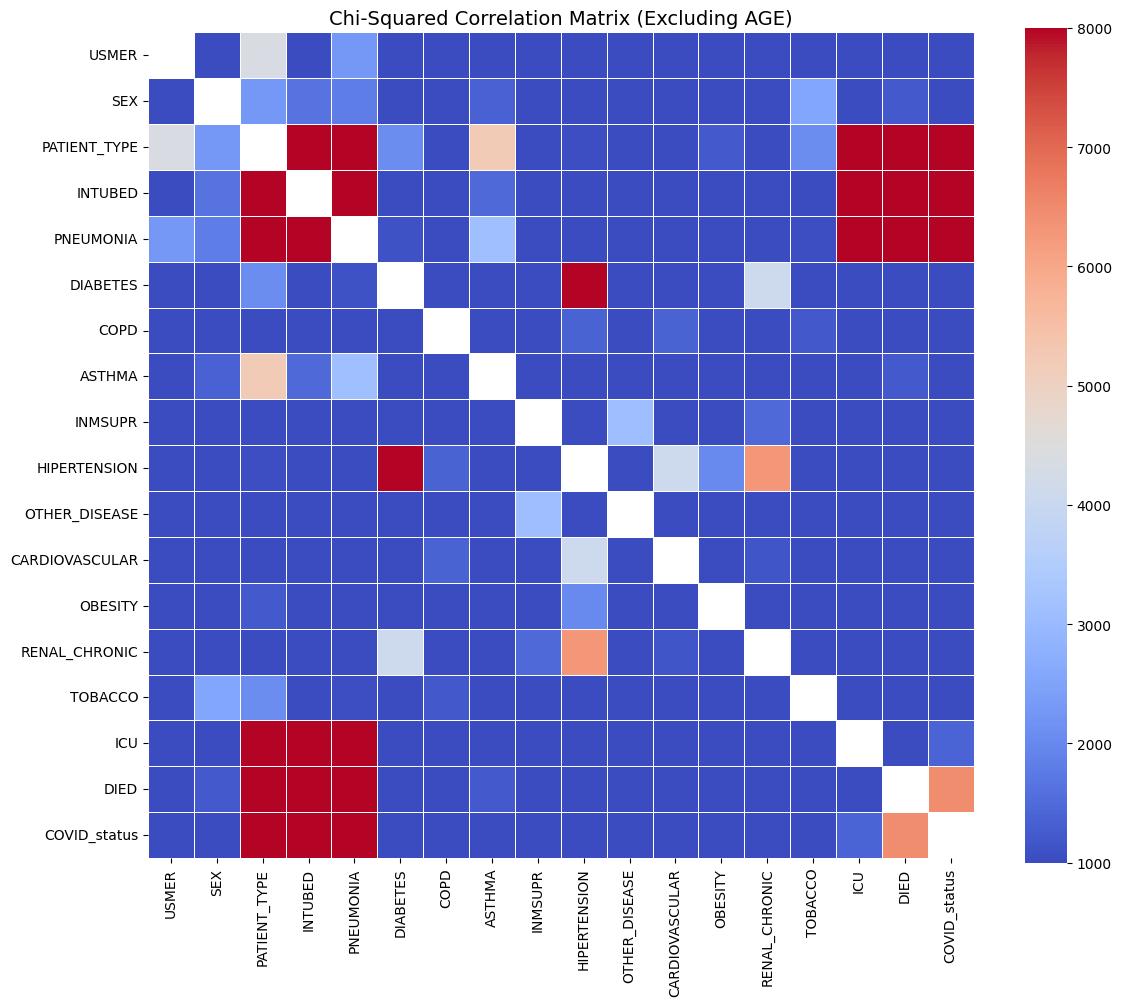

In [22]:
from scipy.stats import chi2_contingency

# Filter columns to include only categorical ones (excluding AGE)
categorical_columns = [col for col in df.columns if col != "AGE" and df[col].nunique() > 1]

# Create a square DataFrame to store Chi2 values
chi2_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns, dtype=float)

# Loop over all unique column pairs
for i, col1 in enumerate(categorical_columns):
    for j, col2 in enumerate(categorical_columns):
        if i <= j:
            # Filter out 'Unknown' values in both columns
            mask = (df[col1] != "Unknown") & (df[col2] != "Unknown")
            filtered_df = df[mask]

            # Only compute if both columns still have at least 2 categories
            if filtered_df[col1].nunique() > 1 and filtered_df[col2].nunique() > 1:
                contingency_table = pd.crosstab(filtered_df[col1], filtered_df[col2])
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                chi2_matrix.loc[col1, col2] = chi2
                chi2_matrix.loc[col2, col1] = chi2  # make symmetric
            else:
                chi2_matrix.loc[col1, col2] = np.nan
                chi2_matrix.loc[col2, col1] = np.nan

# Fill diagonal with NaNs (optional for cleaner heatmap)
np.fill_diagonal(chi2_matrix.values, np.nan)

# Plot Chi-Squared heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(chi2_matrix, annot=False, cmap="coolwarm", linewidths=0.5, square=True, vmin=1000, vmax=8000)
plt.title("Chi-Squared Correlation Matrix (Excluding AGE)", fontsize=14)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [24]:
# Define target columns
target_columns = ["INTUBED", "ICU", "USMER", "PATIENT_TYPE", "DIED"]

# Exclude AGE column and target columns from predictors
predictor_columns = [col for col in df.columns if col not in ["AGE"] + target_columns]

# Dictionary to store chi-square test results
chi_square_results = {}

# Perform Chi-Square test for each predictor against each target variable
for target in target_columns:
    chi_square_results[target] = {}
    for predictor in predictor_columns:
        # Drop rows with "unknown" in either predictor or target
        mask = (df[predictor] != "Unknown") & (df[target] != "Unknown")
        filtered_df = df[mask]

        # Proceed only if both columns have at least two unique values
        if filtered_df[predictor].nunique() > 1 and filtered_df[target].nunique() > 1:
            contingency_table = pd.crosstab(filtered_df[predictor], filtered_df[target])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            chi_square_results[target][predictor] = {"Chi2": chi2, "p-value": p}

# Convert results to a DataFrame for better readability
chi_square_df = pd.DataFrame.from_dict({(i, j): chi_square_results[i][j] 
                                        for i in chi_square_results.keys() 
                                        for j in chi_square_results[i].keys()}, 
                                       orient='index')

# Show the results sorted by p-value (significance level)
chi_square_df.sort_values(by="p-value", inplace=True)
chi_square_df



Chi2   p-value
INTUBED SEX             1632.984413  0.000000
        PNEUMONIA      17223.336045  0.000000
        ASTHMA          1478.537148  0.000000
ICU     PNEUMONIA      11091.637485  0.000000
INTUBED COVID_status    8867.974881  0.000000
...                             ...       ...
USMER   OTHER_DISEASE      9.391322  0.002180
ICU     OBESITY            4.868803  0.027346
USMER   COPD               0.785072  0.375595
        SEX                0.444464  0.504976
ICU     DIABETES           0.159724  0.689410

[65 rows x 2 columns]

In [25]:
# Display full Chi-Square results for INTUBED,ICU, USMER,PATIENT_TYPE, and DIED
print("INTUBED Associations:\n", chi_square_df.loc["INTUBED"].sort_values(by="p-value"))
print("\nICU Associations:\n", chi_square_df.loc["ICU"].sort_values(by="p-value"))
print("\nUSMER Associations:\n", chi_square_df.loc["USMER"].sort_values(by="p-value"))
print("\nPATIENT_TYPE Associations:\n", chi_square_df.loc["PATIENT_TYPE"].sort_values(by="p-value"))
print("\nDIED Associations:\n", chi_square_df.loc["DIED"].sort_values(by="p-value"))

INTUBED Associations:
                         Chi2        p-value
SEX              1632.984413   0.000000e+00
PNEUMONIA       17223.336045   0.000000e+00
ASTHMA           1478.537148   0.000000e+00
COVID_status     8867.974881   0.000000e+00
TOBACCO           877.003118  9.798022e-193
INMSUPR           289.834666   5.402329e-65
CARDIOVASCULAR    270.460852   9.004692e-61
OTHER_DISEASE     220.051326   8.814307e-50
OBESITY           218.472481   1.947958e-49
COPD              199.126150   3.239870e-45
DIABETES           95.510649   1.470979e-22
RENAL_CHRONIC      70.653291   4.258568e-17
HIPERTENSION       52.699719   3.886467e-13

ICU Associations:
                         Chi2        p-value
PNEUMONIA       11091.637485   0.000000e+00
COVID_status     1391.907319  1.205007e-304
SEX               552.100979  4.394843e-122
ASTHMA            523.057345  9.149128e-116
TOBACCO           386.747783   4.225677e-86
OTHER_DISEASE     127.051361   1.810275e-29
RENAL_CHRONIC     113.983294   1.

In [26]:
covid_intubed = df[(df["COVID_status"] != "Unknown") & (df["INTUBED"] != "Unknown")]
chi_covid_intubed = pd.crosstab(covid_intubed["COVID_status"], covid_intubed["INTUBED"])
print(chi_covid_intubed)

INTUBED           No    Yes
COVID_status               
Negative      112512  10726
Positive       87575  25713


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236526 entries, 0 to 236525
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   USMER           236526 non-null  object
 1   SEX             236526 non-null  object
 2   PATIENT_TYPE    236526 non-null  object
 3   INTUBED         236526 non-null  object
 4   PNEUMONIA       236526 non-null  object
 5   AGE             236526 non-null  int64 
 6   DIABETES        236526 non-null  object
 7   COPD            236526 non-null  object
 8   ASTHMA          236526 non-null  object
 9   INMSUPR         236526 non-null  object
 10  HIPERTENSION    236526 non-null  object
 11  OTHER_DISEASE   236526 non-null  object
 12  CARDIOVASCULAR  236526 non-null  object
 13  OBESITY         236526 non-null  object
 14  RENAL_CHRONIC   236526 non-null  object
 15  TOBACCO         236526 non-null  object
 16  ICU             236526 non-null  object
 17  DIED            236526 non-nu

In [28]:
association_data = {
    "INTUBED": {
        "SEX": [1632.984413, 0.0],
        "PNEUMONIA": [17223.336045, 0.0],
        "ASTHMA": [1478.537148, 0.0],
        "COVID_status": [8867.974881, 0.0],
        "TOBACCO": [877.003118, 9.798022e-193],
        "INMSUPR": [289.834666, 5.402329e-65],
        "CARDIOVASCULAR": [270.460852, 9.004692e-61],
        "OTHER_DISEASE": [220.051326, 8.814307e-50],
        "OBESITY": [218.472481, 1.947958e-49],
        "COPD": [199.126150, 3.239870e-45],
        "DIABETES": [95.510649, 1.470979e-22],
        "RENAL_CHRONIC": [70.653291, 4.258568e-17],
        "HIPERTENSION": [52.699719, 3.886467e-13]
    },
    "ICU": {
        "PNEUMONIA": [11091.637485, 0.0],
        "COVID_status": [1391.907319, 1.205007e-304],
        "SEX": [552.100979, 4.394843e-122],
        "ASTHMA": [523.057345, 9.149128e-116],
        "TOBACCO": [386.747783, 4.225677e-86],
        "OTHER_DISEASE": [127.051361, 1.810275e-29],
        "RENAL_CHRONIC": [113.983294, 1.314110e-26],
        "COPD": [110.596018, 7.254515e-26],
        "HIPERTENSION": [64.623507, 9.066720e-16],
        "INMSUPR": [43.689865, 3.847591e-11],
        "CARDIOVASCULAR": [42.105094, 8.649756e-11],
        "OBESITY": [4.868803, 2.734646e-02],
        "DIABETES": [0.159724, 6.894104e-01]
    },
    "USMER": {
        "PNEUMONIA": [2276.646320, 0.0],
        "OBESITY": [210.497665, 1.069769e-47],
        "TOBACCO": [111.630904, 4.304256e-26],
        "RENAL_CHRONIC": [78.953732, 6.358171e-19],
        "DIABETES": [47.860952, 4.575441e-12],
        "CARDIOVASCULAR": [41.878260, 9.713668e-11],
        "INMSUPR": [39.198389, 3.828559e-10],
        "HIPERTENSION": [37.361596, 9.813564e-10],
        "ASTHMA": [18.119812, 2.074319e-05],
        "COVID_status": [10.057168, 1.517564e-03],
        "OTHER_DISEASE": [9.391322, 2.180149e-03],
        "COPD": [0.785072, 3.755945e-01],
        "SEX": [0.444464, 5.049756e-01]
    },
    "PATIENT_TYPE": {
        "ASTHMA": [5185.233103, 0.0],
        "SEX": [2264.792395, 0.0],
        "PNEUMONIA": [56607.128889, 0.0],
        "COVID_status": [8461.742621, 0.0],
        "TOBACCO": [2083.756263, 0.0],
        "DIABETES": [2091.333683, 0.0],
        "OBESITY": [1228.403793, 4.096587e-269],
        "HIPERTENSION": [1029.970971, 5.492275e-226],
        "RENAL_CHRONIC": [377.835064, 3.683878e-84],
        "OTHER_DISEASE": [163.359460, 2.087819e-37],
        "CARDIOVASCULAR": [144.539107, 2.708473e-33],
        "INMSUPR": [42.365989, 7.569498e-11],
        "COPD": [34.040198, 5.398519e-09]
    },
    "DIED": {
        "PNEUMONIA": [9659.350078, 0.0],
        "COVID_status": [6468.333657, 0.0],
        "ASTHMA": [1240.594674, 9.184705e-272],
        "SEX": [1224.836070, 2.442159e-268],
        "TOBACCO": [786.840154, 3.919929e-173],
        "DIABETES": [536.329341, 1.185718e-118],
        "HIPERTENSION": [318.529136, 3.028932e-71],
        "OBESITY": [312.867320, 5.183313e-70],
        "OTHER_DISEASE": [236.836192, 1.925642e-53],
        "INMSUPR": [202.366411, 6.359792e-46],
        "CARDIOVASCULAR": [136.495221, 1.554874e-31],
        "COPD": [26.506288, 2.626817e-07],
        "RENAL_CHRONIC": [9.945895, 1.612085e-03]
    }
}


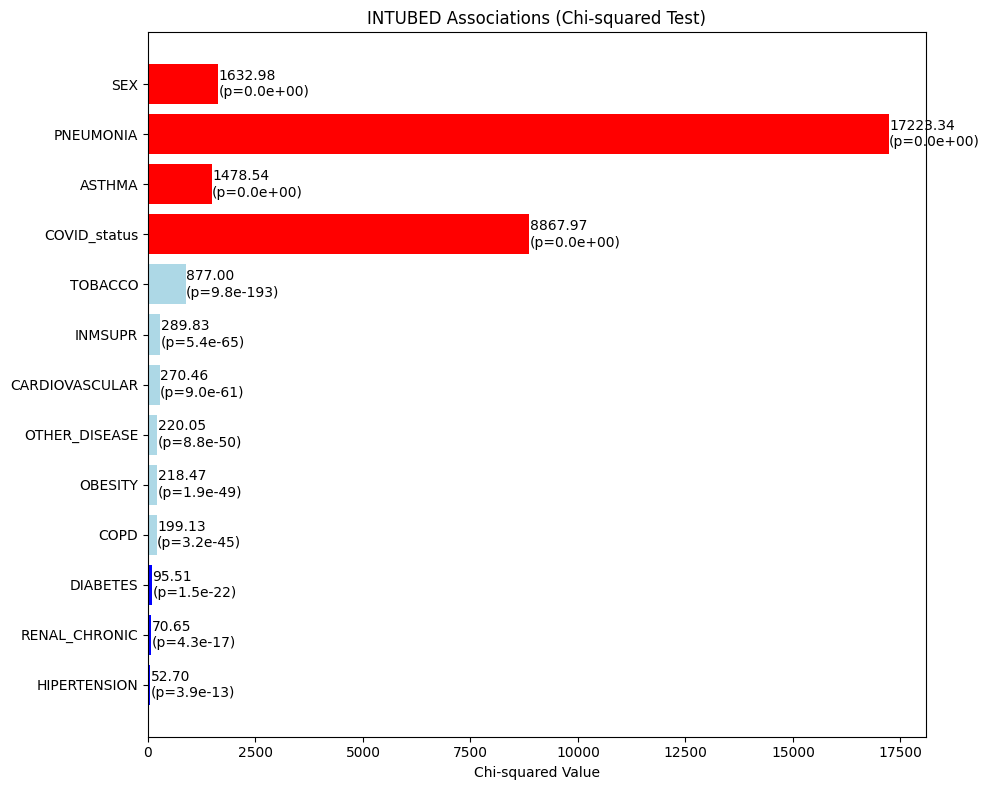

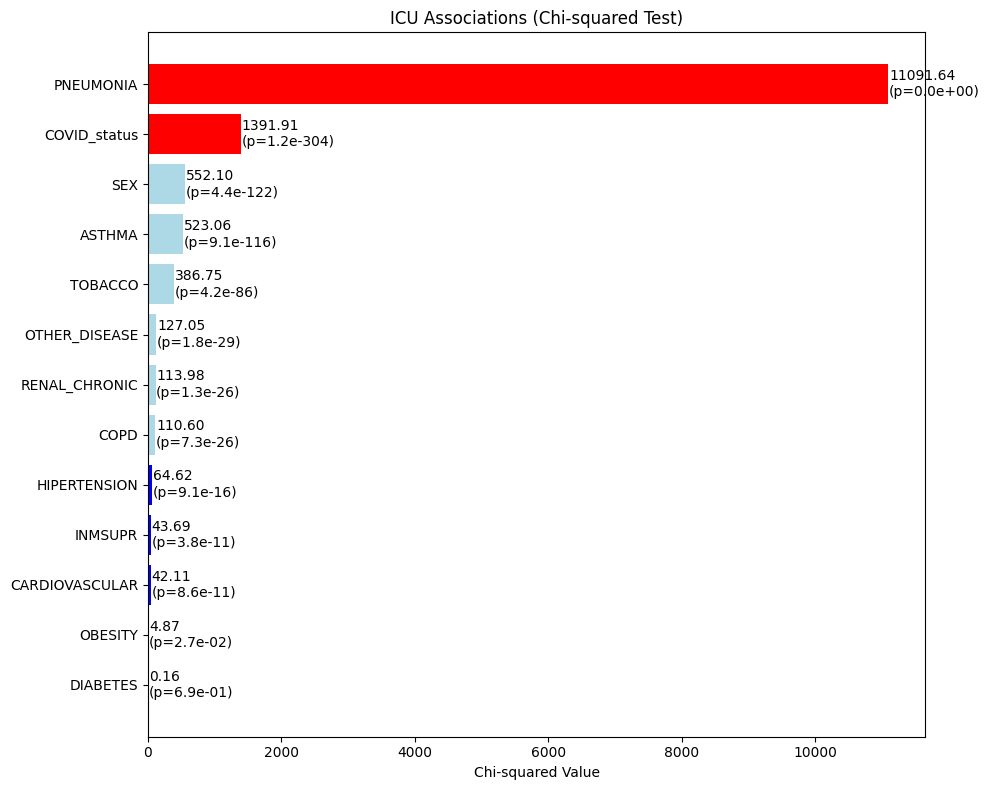

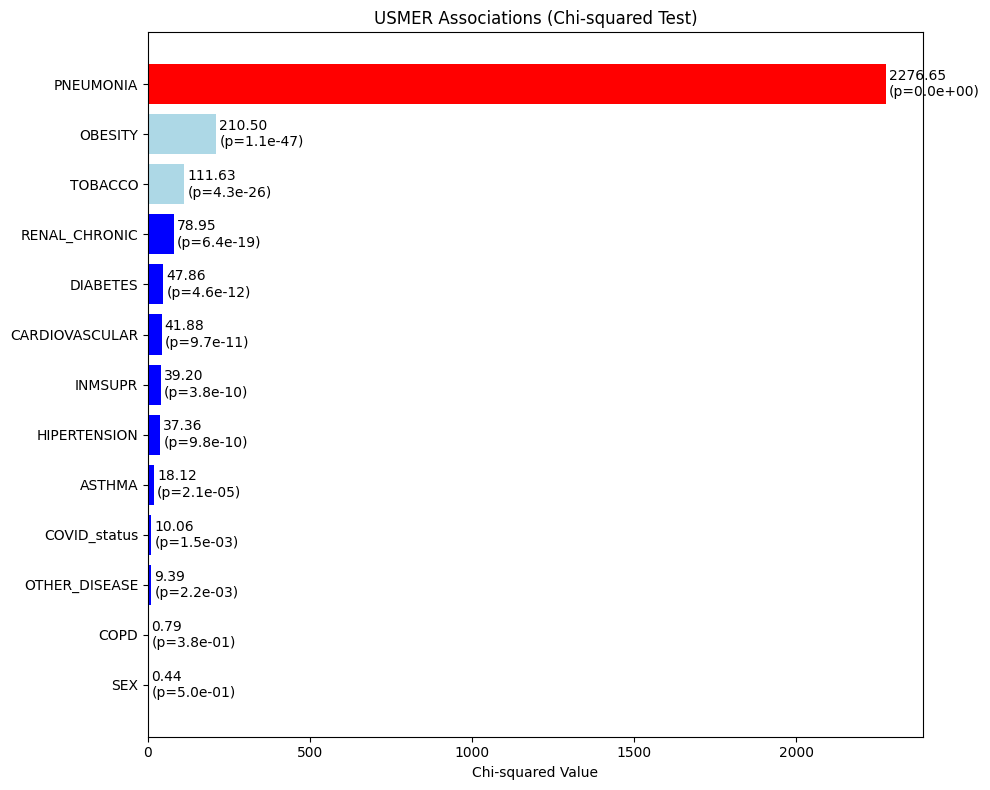

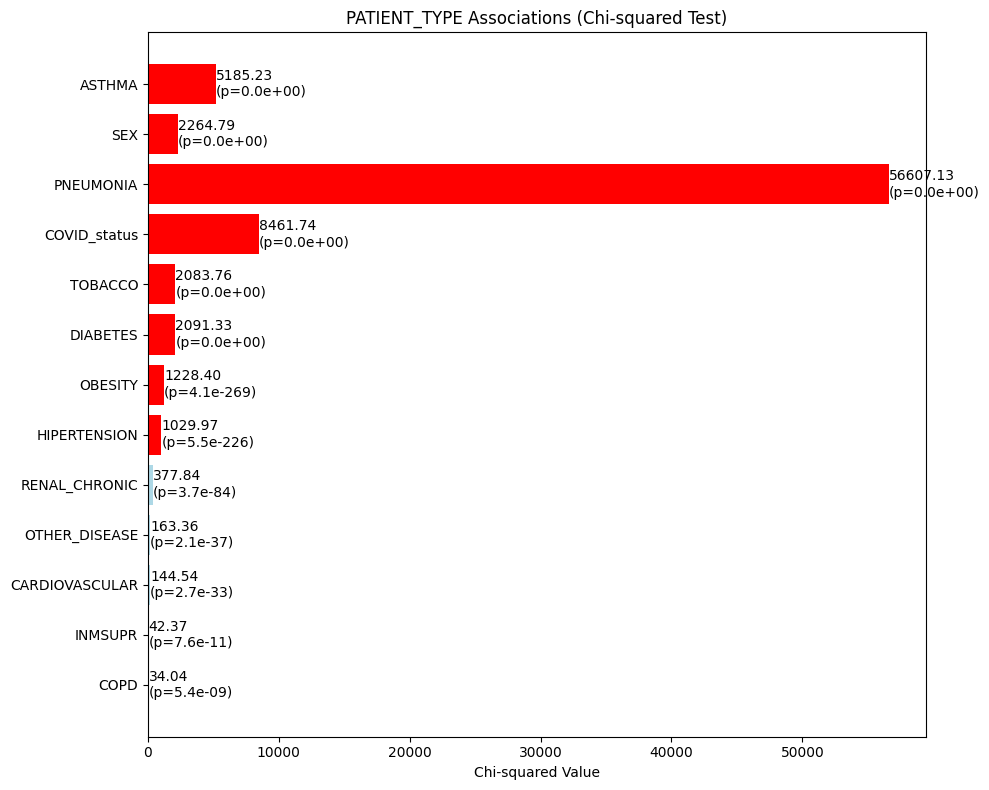

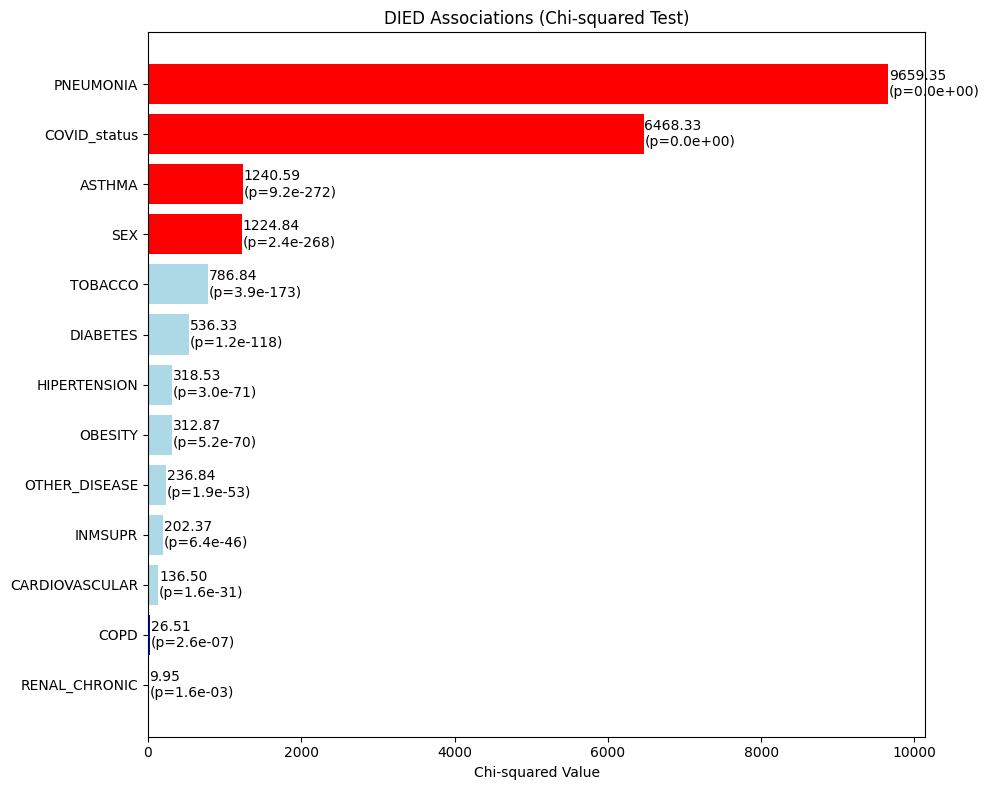

In [29]:
# Helper functions
def classify_strength(chi2):
    if chi2 > 1000:
        return 'Strong'
    elif chi2 > 100:
        return 'Moderate'
    else:
        return 'Weak'

color_map = {'Strong': 'red', 'Moderate': 'lightblue', 'Weak': 'blue'}

def process_association_data(data_dict):
    # Create a copy of the data to avoid modifying the original DataFrame
    df_chi = pd.DataFrame(data_dict, index=["Chi2", "p-value"]).T.copy()
    df_chi["Strength"] = df_chi["Chi2"].apply(classify_strength)
    df_chi["Color"] = df_chi["Strength"].map(color_map)
    return df_chi.sort_values(by="p-value")

# Process association data for all outcomes
association_dfs = {key: process_association_data(value) for key, value in association_data.items()}

# Plotting function
def plot_association_bars(df, title):
    plt.figure(figsize=(10, 8))
    sorted_df = df.sort_values(by="p-value")
    for i, (index, row) in enumerate(sorted_df.iterrows()):
        plt.barh(i, row["Chi2"], color=row["Color"])
        plt.text(row["Chi2"] + 10, i, f'{row["Chi2"]:.2f}\n(p={row["p-value"]:.1e})', va='center')
    plt.yticks(range(len(sorted_df)), sorted_df.index)
    plt.xlabel("Chi-squared Value")
    plt.title(f"{title} Associations (Chi-squared Test)")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Plot each outcome
for outcome, df in association_dfs.items():
    plot_association_bars(df, outcome)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, PNEUMONIA to RENAL_CHRONIC
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Chi2      13 non-null     float64
 1   p-value   13 non-null     float64
 2   Strength  13 non-null     object 
 3   Color     13 non-null     object 
dtypes: float64(2), object(2)
memory usage: 520.0+ bytes


In [31]:
df = raw_df.copy()

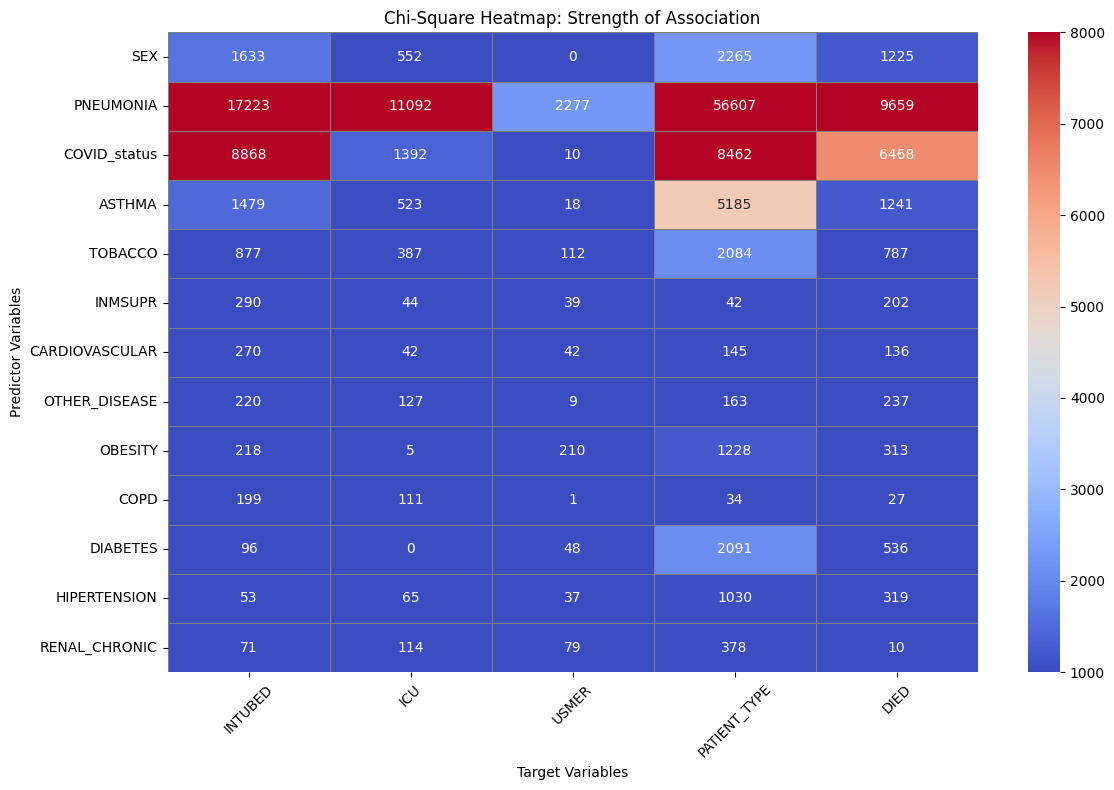

In [33]:
# Dictionary of Chi-Square results
chi2_data = {
    "INTUBED": {
        "SEX": 1632.984413, "PNEUMONIA": 17223.336045, "COVID_status": 8867.974881, "ASTHMA": 1478.537148,
        "TOBACCO": 877.003118, "INMSUPR": 289.834666, "CARDIOVASCULAR": 270.460852, "OTHER_DISEASE": 220.051326,
        "OBESITY": 218.472481, "COPD": 199.126150, "DIABETES": 95.510649, "HIPERTENSION": 52.699719,
        "RENAL_CHRONIC": 70.653291
    },
    "ICU": {
        "PNEUMONIA": 11091.637485, "COVID_status": 1391.907319, "ASTHMA": 523.057345, "SEX": 552.100979,
        "TOBACCO": 386.747783, "RENAL_CHRONIC": 113.983294, "COPD": 110.596018, "OTHER_DISEASE": 127.051361,
        "HIPERTENSION": 64.623507, "INMSUPR": 43.689865, "CARDIOVASCULAR": 42.105094, "OBESITY": 4.868803,
        "DIABETES": 0.159724
    },
    "USMER": {
        "PNEUMONIA": 2276.646320, "OBESITY": 210.497665, "TOBACCO": 111.630904, "RENAL_CHRONIC": 78.953732,
        "DIABETES": 47.860952, "CARDIOVASCULAR": 41.878260, "INMSUPR": 39.198389, "HIPERTENSION": 37.361596,
        "ASTHMA": 18.119812, "COVID_status": 10.057168, "OTHER_DISEASE": 9.391322, "COPD": 0.785072,
        "SEX": 0.444464
    },
    "PATIENT_TYPE": {
        "DIABETES": 2091.333683, "ASTHMA": 5185.233103, "SEX": 2264.792395, "PNEUMONIA": 56607.128889,
        "COVID_status": 8461.742621, "TOBACCO": 2083.756263, "OBESITY": 1228.403793, "HIPERTENSION": 1029.970971,
        "RENAL_CHRONIC": 377.835064, "OTHER_DISEASE": 163.359460, "CARDIOVASCULAR": 144.539107,
        "INMSUPR": 42.365989, "COPD": 34.040198
    },
    "DIED": {
        "PNEUMONIA": 9659.350078, "COVID_status": 6468.333657, "ASTHMA": 1240.594674, "SEX": 1224.836070,
        "TOBACCO": 786.840154, "DIABETES": 536.329341, "HIPERTENSION": 318.529136, "OBESITY": 312.867320,
        "OTHER_DISEASE": 236.836192, "INMSUPR": 202.366411, "CARDIOVASCULAR": 136.495221,
        "COPD": 26.506288, "RENAL_CHRONIC": 9.945895
    }
}


# Convert to DataFrame and make a copy
chi2_df = pd.DataFrame(chi2_data).fillna(0).copy()

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(chi2_df, annot=True, fmt=".0f", cmap='coolwarm', linewidths=0.5, linecolor='gray', vmin=1000, vmax=8000)
plt.title("Chi-Square Heatmap: Strength of Association")
plt.xlabel("Target Variables")
plt.ylabel("Predictor Variables")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236526 entries, 0 to 236525
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   USMER           236526 non-null  object
 1   SEX             236526 non-null  object
 2   PATIENT_TYPE    236526 non-null  object
 3   INTUBED         236526 non-null  object
 4   PNEUMONIA       236526 non-null  object
 5   AGE             236526 non-null  int64 
 6   DIABETES        236526 non-null  object
 7   COPD            236526 non-null  object
 8   ASTHMA          236526 non-null  object
 9   INMSUPR         236526 non-null  object
 10  HIPERTENSION    236526 non-null  object
 11  OTHER_DISEASE   236526 non-null  object
 12  CARDIOVASCULAR  236526 non-null  object
 13  OBESITY         236526 non-null  object
 14  RENAL_CHRONIC   236526 non-null  object
 15  TOBACCO         236526 non-null  object
 16  ICU             236526 non-null  object
 17  DIED            236526 non-nu

In [35]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Function to calculate Cramér’s V
def cramers_v(contingency_table):
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Define target and predictor columns
target_columns = ["INTUBED", "ICU", "USMER", "PATIENT_TYPE", "DIED"]
predictor_columns = [col for col in df.columns if col not in ["AGE"] + target_columns]

# Compute Cramér’s V for each predictor vs target
cramers_v_results = {}
for target in target_columns:
    cramers_v_results[target] = {}
    for predictor in predictor_columns:
        mask = (df[predictor] != "Unknown") & (df[target] != "Unknown")
        filtered = df[mask]

        if filtered[predictor].nunique() > 1 and filtered[target].nunique() > 1:
            table = pd.crosstab(filtered[predictor], filtered[target])
            cramers_v_results[target][predictor] = cramers_v(table)
        else:
            cramers_v_results[target][predictor] = np.nan

# Convert to DataFrame
cramers_v_df = pd.DataFrame(cramers_v_results)


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236526 entries, 0 to 236525
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   USMER           236526 non-null  object
 1   SEX             236526 non-null  object
 2   PATIENT_TYPE    236526 non-null  object
 3   INTUBED         236526 non-null  object
 4   PNEUMONIA       236526 non-null  object
 5   AGE             236526 non-null  int64 
 6   DIABETES        236526 non-null  object
 7   COPD            236526 non-null  object
 8   ASTHMA          236526 non-null  object
 9   INMSUPR         236526 non-null  object
 10  HIPERTENSION    236526 non-null  object
 11  OTHER_DISEASE   236526 non-null  object
 12  CARDIOVASCULAR  236526 non-null  object
 13  OBESITY         236526 non-null  object
 14  RENAL_CHRONIC   236526 non-null  object
 15  TOBACCO         236526 non-null  object
 16  ICU             236526 non-null  object
 17  DIED            236526 non-nu

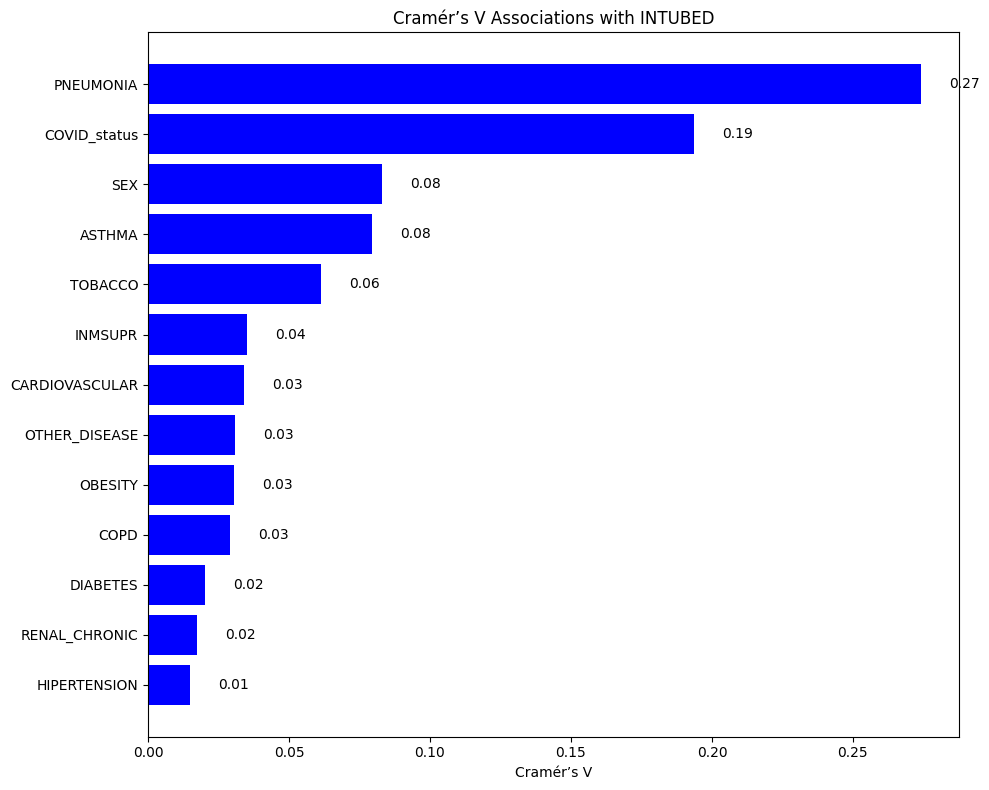

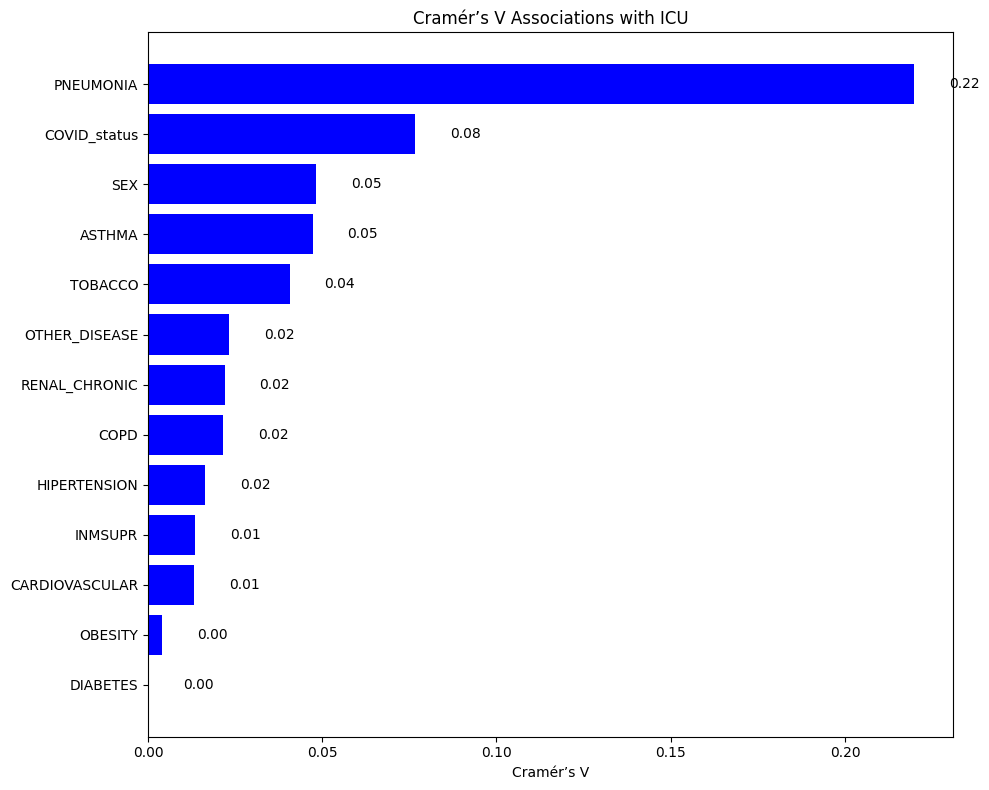

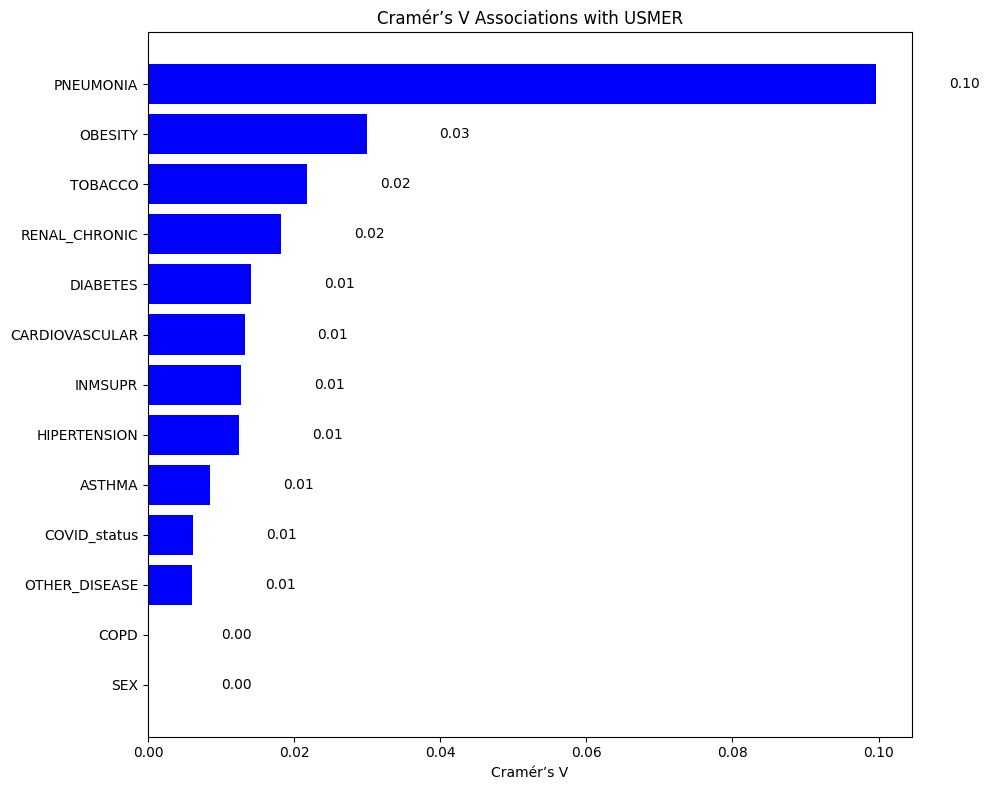

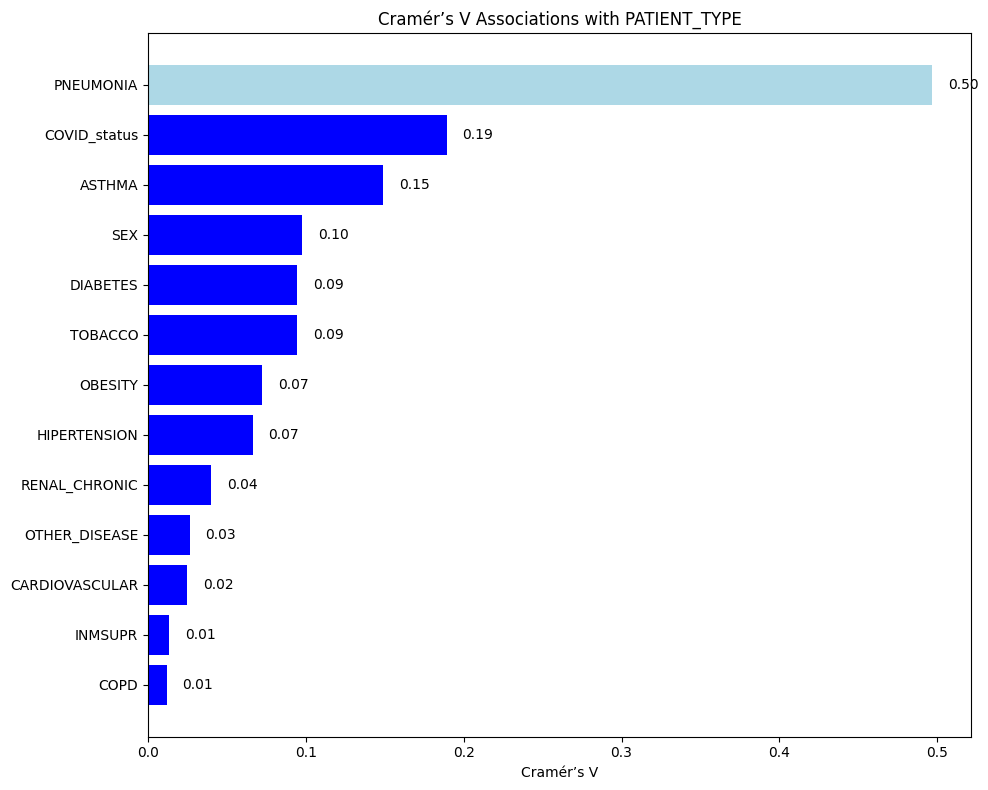

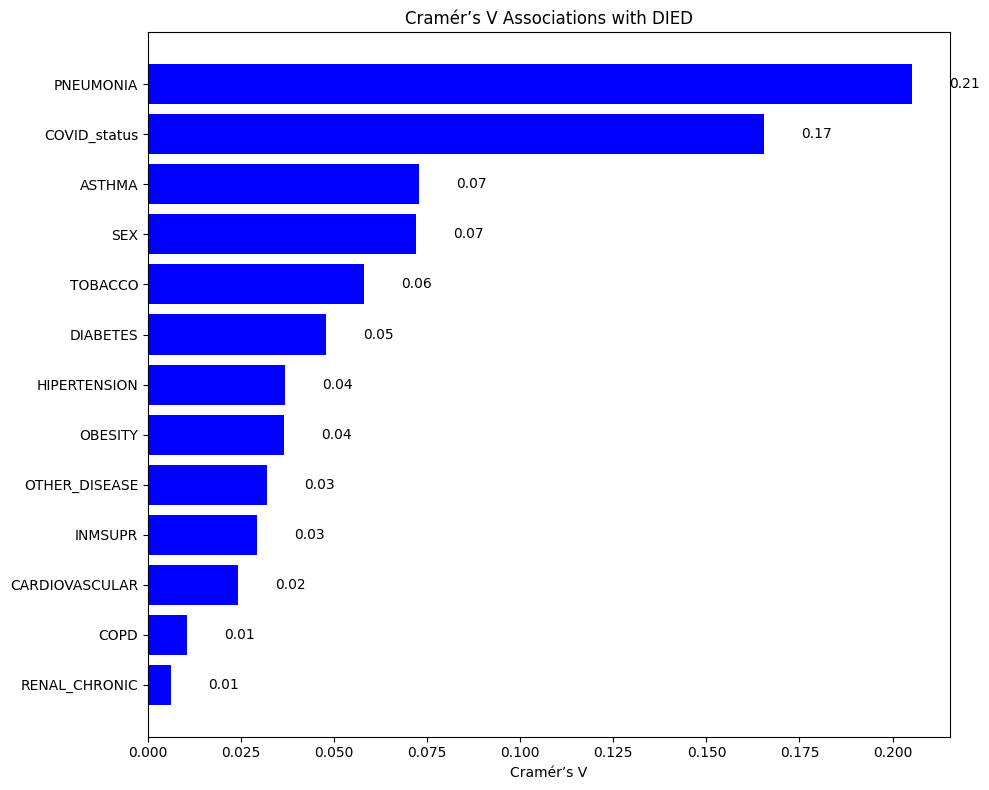

In [37]:
import matplotlib.pyplot as plt

# Define color by strength
def strength_color(v):
    if v >= 0.5:
        return 'red'        # Strong
    elif v >= 0.3:
        return 'lightblue'  # Moderate
    else:
        return 'blue'       # Weak

# Plot bar chart for each target
def plot_cramers_v_bars(target, df_cramer):
    values = df_cramer[target].dropna().sort_values(ascending=False)
    colors = values.apply(strength_color)

    plt.figure(figsize=(10, 8))
    for i, (var, val) in enumerate(values.items()):
        plt.barh(i, val, color=colors[var])
        plt.text(val + 0.01, i, f"{val:.2f}", va='center')
    
    plt.yticks(range(len(values)), values.index)
    plt.xlabel("Cramér’s V")
    plt.title(f"Cramér’s V Associations with {target}")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Generate plots for each outcome
for outcome in target_columns:
    plot_cramers_v_bars(outcome, cramers_v_df)


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236526 entries, 0 to 236525
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   USMER           236526 non-null  object
 1   SEX             236526 non-null  object
 2   PATIENT_TYPE    236526 non-null  object
 3   INTUBED         236526 non-null  object
 4   PNEUMONIA       236526 non-null  object
 5   AGE             236526 non-null  int64 
 6   DIABETES        236526 non-null  object
 7   COPD            236526 non-null  object
 8   ASTHMA          236526 non-null  object
 9   INMSUPR         236526 non-null  object
 10  HIPERTENSION    236526 non-null  object
 11  OTHER_DISEASE   236526 non-null  object
 12  CARDIOVASCULAR  236526 non-null  object
 13  OBESITY         236526 non-null  object
 14  RENAL_CHRONIC   236526 non-null  object
 15  TOBACCO         236526 non-null  object
 16  ICU             236526 non-null  object
 17  DIED            236526 non-nu

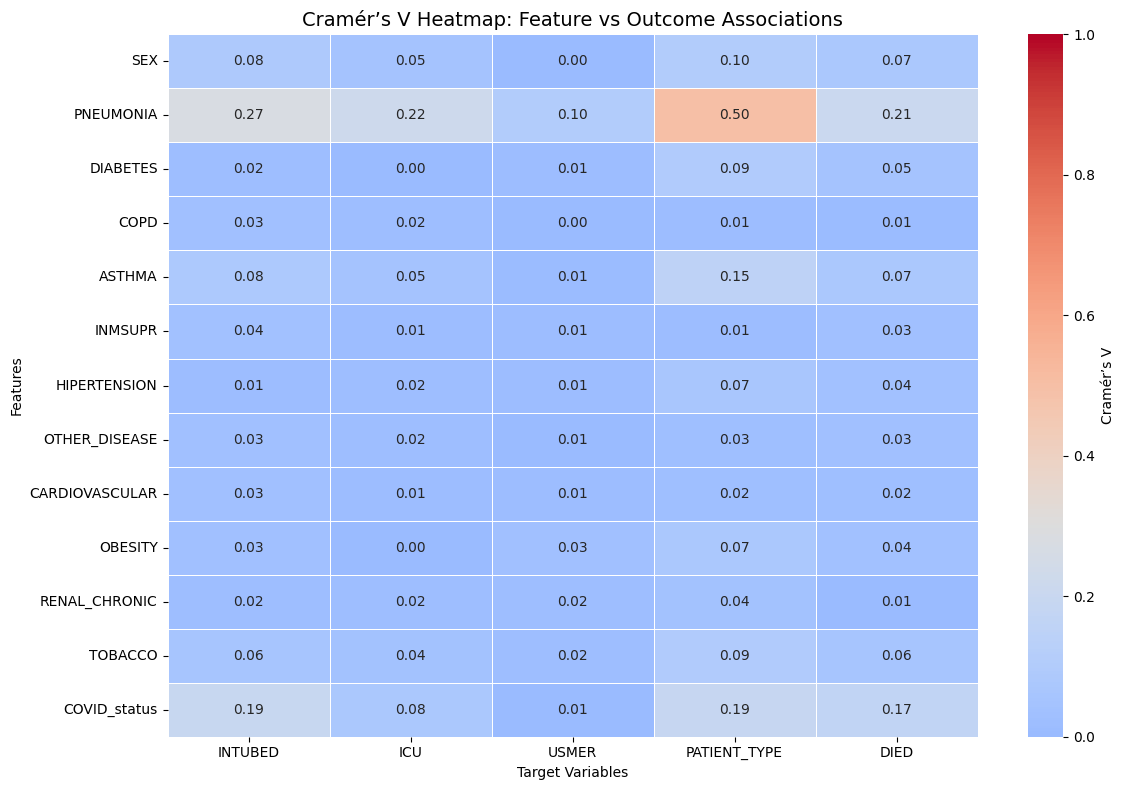

In [39]:
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap from cramers_v_df
sns.heatmap(
    cramers_v_df,
    annot=True,              # Show values in cells
    cmap="coolwarm",         # Or use 'RdBu_r', 'YlGnBu', etc.
    center=0.3,              # Center the color scale around 0.3 to reflect "Moderate"
    vmin=0, vmax=1,          # Cramér's V ranges from 0 to 1
    fmt=".2f",               # Format annotation labels
    linewidths=0.5,          # Grid lines
    cbar_kws={"label": "Cramér’s V"}
)

plt.title("Cramér’s V Heatmap: Feature vs Outcome Associations", fontsize=14)
plt.xlabel("Target Variables")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [40]:
df = raw_df.copy()

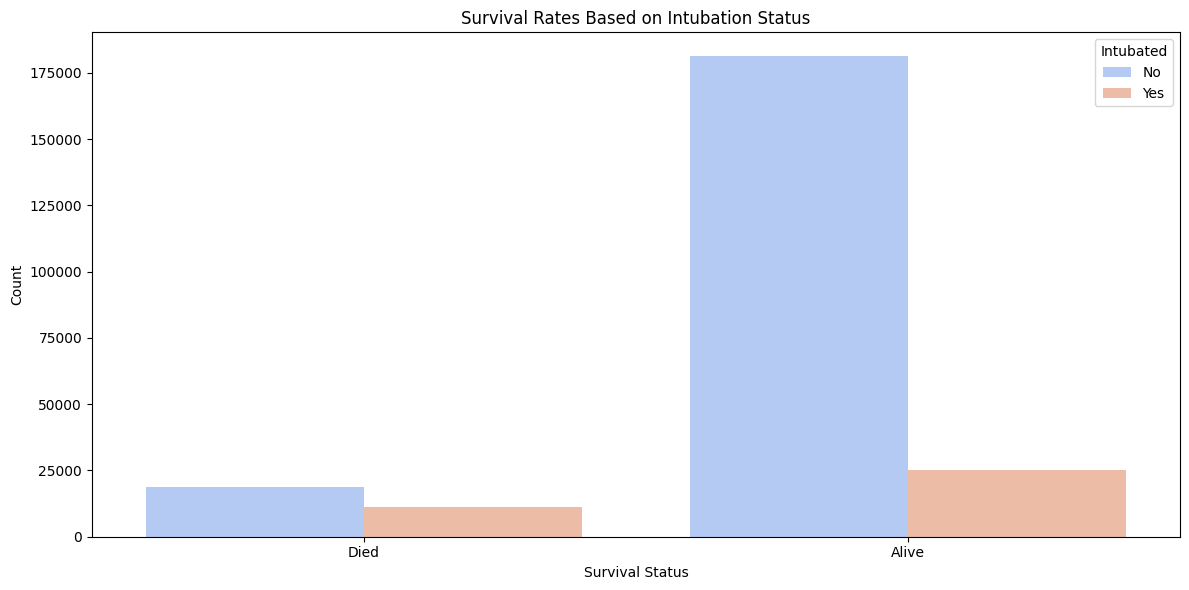

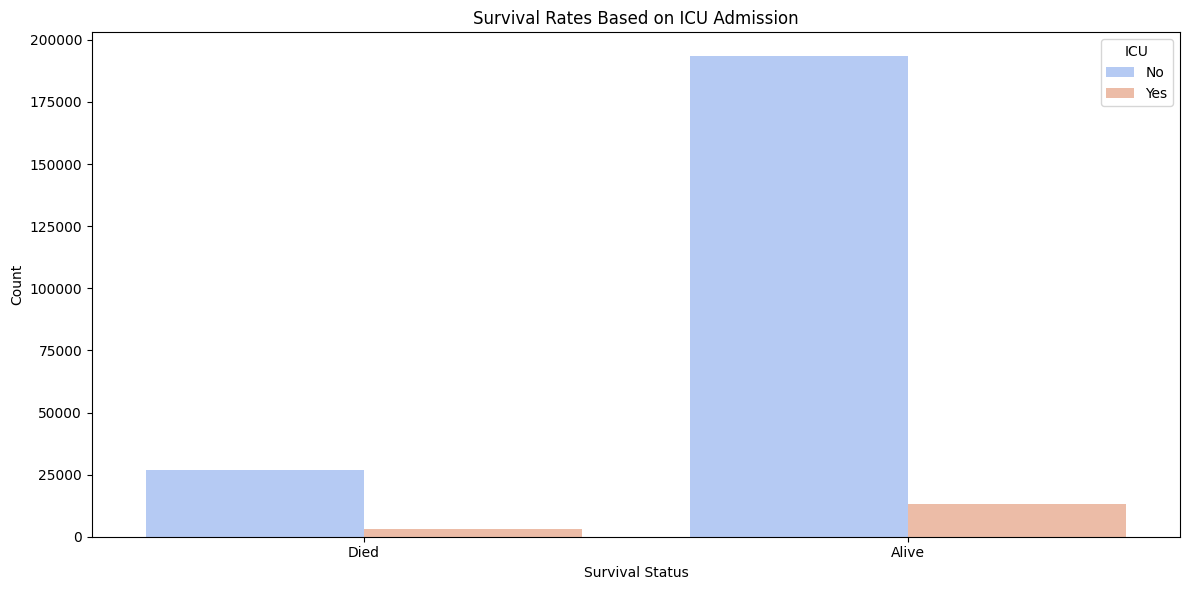

In [41]:
# Filter out "Unknown" from INTUBED and DIED
filtered_df_intubed = df[
    (df['INTUBED'] != 'Unknown') &
    (df['DIED'] != 'Unknown')
].copy()

# Filter out "Unknown" from ICU and DIED
filtered_df_icu = df[
    (df['ICU'] != 'Unknown') &
    (df['DIED'] != 'Unknown')
].copy()

# INTUBED plot
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df_intubed, x='DIED', hue='INTUBED', palette='coolwarm')
plt.title("Survival Rates Based on Intubation Status")
plt.xlabel("Survival Status")
plt.ylabel("Count")
plt.legend(title="Intubated", labels=["No", "Yes"])  # Will show only filtered values
plt.tight_layout()
plt.show()

# ICU plot
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df_icu, x='DIED', hue='ICU', palette='coolwarm')
plt.title("Survival Rates Based on ICU Admission")
plt.xlabel("Survival Status")
plt.ylabel("Count")
plt.legend(title="ICU", labels=["No", "Yes"])  # Will show only filtered values
plt.tight_layout()
plt.show()


In [42]:

from scipy.stats import shapiro, kstest

# Shapiro-Wilk test (best for small samples, but limited to n < 5000)
shapiro_test = shapiro(df["AGE"].dropna())

# Kolmogorov-Smirnov test (used for large samples)
kstest_result = kstest(df["AGE"].dropna(), 'norm')

print(f"Shapiro-Wilk Test: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")
print(f"Kolmogorov-Smirnov Test: D={kstest_result.statistic}, p-value={kstest_result.pvalue}")


Shapiro-Wilk Test: W=0.9901358619635545, p-value=1.747580403340034e-70
Kolmogorov-Smirnov Test: D=0.9873912974394808, p-value=0.0


c:\Users\mahmo\miniconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 236526.
  res = hypotest_fun_out(*samples, **kwds)


In [43]:
from scipy.stats import kruskal

for target in ["INTUBED", "ICU", "USMER", "PATIENT_TYPE", "DIED"]:
    groups = [df[df[target] == category]["AGE"].dropna() for category in df[target].unique()]
    h_stat, p_val = kruskal(*groups)
    print(f"Kruskal-Wallis for {target}: H={h_stat}, p-value={p_val}")

Kruskal-Wallis for INTUBED: H=3048.463820126873, p-value=0.0
Kruskal-Wallis for ICU: H=45.75306455886805, p-value=1.3413933481820762e-11
Kruskal-Wallis for USMER: H=180.30369514829832, p-value=4.1601754624307756e-41
Kruskal-Wallis for PATIENT_TYPE: H=15379.409391072548, p-value=0.0
Kruskal-Wallis for DIED: H=7001.472906526952, p-value=0.0
